# Prepare "virtual" coordinate system for midrange connectivity
Requirements: <code>bluepy</code>, <code>conntility</code>

### Get locations of neurons in flat mapping coordinate system (super-sampled)
[Code provided by M. Reimann]

In [4]:
from bluepy import Circuit
from conntility.flatmapping import wm_recipe_utility
from conntility.circuit_models.neuron_groups import load_with_config

In [5]:
cfg = "/gpfs/bbp.cscs.ch/project/proj83/circuits/Bio_M/20200805/CircuitConfig"
fn_recipe = "/gpfs/bbp.cscs.ch/project/proj83/scratch/home/reimann/rat_wm_recipe_tr_ll_ul_un_n_m_subtract_adjacents.yaml"

circ = Circuit(cfg)

# Get flat mapping coordinates for each voxel as VoxelData
atlas_out = wm_recipe_utility.atlas_of_mapping_coordinates(fn_recipe, circ, supersample=True) # Can also try =True

# Save per-voxel mapping coordinates to a .nrrd file
coord_file = "midrange_flat_mapping_coords_ss.nrrd"
atlas_out.save_nrrd(coord_file)

/gpfs/bbp.cscs.ch/ssd/apps/hpc/jenkins/deploy/libraries/2021-01-06/linux-rhel7-x86_64/gcc-9.3.0/py-scipy-1.5.4-t6m7lq/lib/python3.8/site-packages/scipy/spatial/transform/rotation.py:1967: UserWarning: Optimal rotation is not uniquely or poorly defined for the given sets of vectors.
  warnings.warn("Optimal rotation is not uniquely or poorly defined "


Rotation errors: min: 0.0, median: 0.09387602600937707, mean: 0.1362824184505305, std: 0.15664142313594692, max: 2.0


In [6]:
# Configure what neuron properties to load
to_load = {
    "base_target": "All",  # adapt as needed
    "properties": ["x", "y", "z", "mtype", "layer", "region"],  # adapt as needed. Must keep x, y, z though
    "atlas": [{"data": coord_file,  # loads the mapping coords from .nrrd
               "properties": ["ss_mapping_x", "ss_mapping_y"]}]  # and calls them this
}

# Execute loading
nrn = load_with_config(circ, to_load)

# Save to .feather
nrn_file = 'neuron_info_midrange_mapping_ss.feather'
nrn.to_feather(nrn_file)

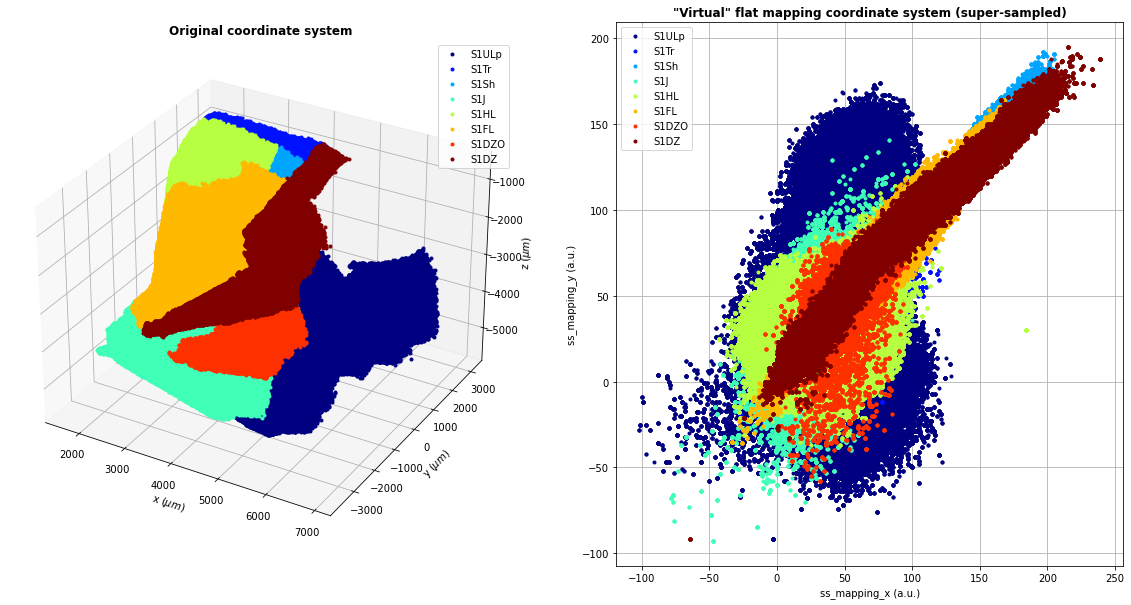

In [32]:
# Visualize flat mapping coordinate system
import numpy as np
import matplotlib.pyplot as plt
regions = np.unique(nrn['region'])
regions = regions[::-1] # Invert region order for better visualization (less overlap)
reg_colors = plt.cm.jet(np.linspace(0, 1, len(regions)))

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1, projection='3d')
for ridx, reg in enumerate(regions):
    pos = nrn[nrn['region'] == reg][['x', 'y', 'z']]
    plt.plot(pos['x'], pos['y'], pos['z'], '.', color=reg_colors[ridx, :], label=reg)
plt.gca().set_xlabel('x ($\mu m$)')
plt.gca().set_ylabel('y ($\mu m$)')
plt.gca().set_zlabel('z ($\mu m$)')
plt.title('Original coordinate system', fontweight='bold')
plt.legend()
plt.subplot(1, 2, 2)
for ridx, reg in enumerate(regions):
    pos = nrn[nrn['region'] == reg][['ss_mapping_x', 'ss_mapping_y']]
    plt.plot(pos['ss_mapping_x'], pos['ss_mapping_y'], '.', color=reg_colors[ridx, :], label=reg)
plt.xlabel('ss_mapping_x (a.u.)')
plt.ylabel('ss_mapping_y (a.u.)')
plt.title('"Virtual" flat mapping coordinate system (super-sampled)', fontweight='bold')
plt.grid()
plt.legend()
plt.show()